In [1]:
import urllib.request
import zipfile
import os
import ssl

try:
    os.mkdir("files")
except:
    pass

ssl._create_default_https_context = ssl._create_unverified_context

with urllib.request.urlopen('https://courses.cs.tau.ac.il/pyProg/2425a/resources/notebook_resources.zip') as f:
    content = f.read()

with open('files/notebook_resources.zip', 'wb') as f:
    f.write(content)

with zipfile.ZipFile('files/notebook_resources.zip', 'r') as zip_ref:
    zip_ref.extractall('files')

print(os.listdir('files'))

import pandas as pd
pd.options.display.max_rows=5


['monday.txt', 'orders_2_2024.csv', 'orders_4_2024.csv', 'dialation_2.png', 'infile1.txt', 'out.txt', 'evil_morty_segmentation.png', 'evil_morty_change_3.png', 'erosion_2.png', 'ex2.csv', 'dog_noised.png', 'dog.png', '__MACOSX', 'ship.png', 'evil_morty_change.png', 'products2.csv', 'countries-of-the-world.csv', 'foods.txt', 'sunday.txt', 'infile2.txt', 'evil_morty_change_noised.png', 'erosion.png', 'evil_morty_1.png', 'StudentsGrades.csv', 'witcher_2.csv', 'ex1.csv', 'witcher_1.csv', 'dialation.png', 'orders_3_2024.csv', 'woman_noised.png', 'baby.png', 'notebook_resources.zip', 'koala.png']


## הצגת נתוני טבלאות בגרפים 

לעיתים קשה להבין נתונים רק מקריאה של טבלאות, במיוחד כשמדובר בכמויות גדולות של מספרים.    
הצגת המידע בצורה גרפית מאפשרת לנו לראות בצורה ברורה ומהירה את העיקר: מגמות, הבדלים וקשרים בין קבוצות נתונים.  
לדוגמא, בצורה גרפית, קל יותר לזהות פערים בממוצע הציונים בין תארים שונים כאשר מספר מספר הסטודנטים שלומדים בכל תואר מאוד גדול.  

בפייתון קיימות ספריות שונות שמקלות על יצירת גרפים ותרשימים, כמו `matplotlib` ו־`seaborn`. 

ב`pandas` קיים ממשק מאוד מאוד עם `matplotlib`, שמאפשרת ליצור גרפים ישירות מתוך ה-`DataFrame` שלנו. 

ביחידה זו נדגים עיצד ניתן ליצור גרפים שונים באמצעות `matplotlib`.  


תחילה נייבא את ספרית `matplotlib`:

In [2]:
import matplotlib.pyplot as plt

שימו לב שייבאנו חלק ספציפי של הספריה (`pyplot`). לאחר הייבוא, נוכל לקרוא לחל' זה באמצעות הקיצור `plt`.

### תבנית לציור גרפים ב`matplotlib`

כדי לצייר גרף בפייתון באמצעות `matplotlib`, נשתמש בתבנית קוד בת 4 חלקים בסיסית שחוזרת על עצמה כמעט בכל ציור. 
1. ניצור מקום לייצר עליו את הגרף שלנו, או "קנבס" באמצעות הפקודה `fig, ax = plt.subplots()`, כאשר ניתן להגדיר את גודל התרשים בעזרת הפרמטר `figsize` (למשל `(4,3)`)
2. נצייר את הגרף עצמו על אותו קנבס לפי סוג התרשים הרצוי. כאן ניתן לצייר מגוון סוגי גרפים, כפי שנראה בהמשך יחידה זו 
3. נוסיף "מקרא" - תיאור אילו צבעים מייצגים אילו נתונים - באמצעות `plt.legend()`.
4. לבסוף, נשתמש ב־`plt.show()` כדי "לצייר" את הגרף בפועל על המסך.

תבנית זו תשמש אותנו כבסיס לכל ציור גרפי שנבצע ב־`matplotlib`. עבור כל סוג גרף, נעזר במתודה שמייצרת שאותו. **על הקורא להבין מה משמעותם של הקלט של כל אחת מהמתודות.** מטרת הדוגמאות היא להדגים את העיקרון הבסיסי של בניית גרפים, אך בנוסף קיימים לכל מתודה פרמטרים רבים המאפשרים שליטה מדויקת על מראה הגרף, סגנון הצבעים, צירי המדידה ועוד. מומלץ להתנסות ולחקור בעצמכם כדי להבין לעומק את הגמישות של הכלים הגרפיים.  

```python
fig, ax = plt.subplots() ## Create canvas. figsize=(4,3) sets the size of the figure (optional)
## Draw your plot here. 
plt.legend() # plot the names that each color represents (optional)
plt.show() # Visualize plot
```

אך קודם כל, נתחיל מטעינת טבלת הציונים שלנו מהקובץ files/StudentsGrades.csv לתוך `df`:

In [3]:
inputFileName = "files/StudentsGrades.csv"
df = pd.read_csv(inputFileName)
display(df)

,Name,Programming,Marine Biology,Stellar Cartography,Math,History,Planet Survival,Art
0,Yael,50,56,70,60,87,65,91
1,Nadav,61,77,75,75,63,52,88
...,...,...,...,...,...,...,...,...
11,Tom,98,76,98,100,98,92,80
12,Adi,76,87,34,90,88,84,70


כעת, נרצה להציג בצורה גרפית את נתוני הטבלה לגבי ציוני המקצועות תכנות ומתמטיקה. ננסה תחילה להדפיסם כ**גרף קווים (line plot)**: 

גרף קווים הוא אחד מסוגי הגרפים הבסיסיים והשכיחים ביותר להצגת קשר בין שני משתנים בעלי סדר, כמו זמן מול ערך מדידה. בכל נקודה על הגרף מיוצג זוג ערכים, והעקומה המחברת ביניהם מדגישה את השינוי או המגמה לאורך הציר. גרף כזה מאפשר לראות בקלות עליות, ירידות, מגמות כלליות והשוואה בין סדרות נתונים שונות.

בדוגמא ניצור גרף קווים על מנת להציג בצורה חזותית את ציוני מקצועות התכנות והמתמטיקה באמצעות המתודה `plot`:

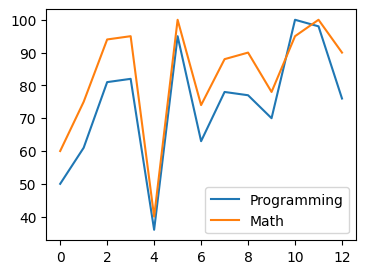

In [4]:
fig, ax = plt.subplots(figsize=(4,3))
columns = ['Programming', 'Math'] 
ax.plot(df.loc[:,columns], label=columns)
plt.legend()
plt.show()

האם הגרף הזה מסביר לדעתכם את הנתונים בצורה טובה יותר?

**גרף קווים נועד להמחיש קשר בין שני משתנים בעלי סדר**, כלומר משתנים שניתן לסדרם לפי ערך עולה או יורד, כמו זמן או טמפרטורה. כאשר אין סדר טבעי – למשל רשימה לא סדורה של סטודנטים – לא ניתן להשתמש בעקומה בצורה נכונה, משום שאין משמעות לסדר בין הנקודות.  

נבחן כעת שימוש בגרף מסוג אחר - Boxplot. **תרשים Boxplot מקבץ נתונים כקבוצות שונות ומציג סיכום סטטיסטי שלהם**. הוא מציג את החציון, את טווח הערכים (מהרבעון התחתון עד הרבעון העליון), ואת הערכים החריגים (outliers) שמופיעים מחוץ לטווח הרגיל של הנתונים. התרשים מאפשר להבין במבט אחד את פיזור הנתונים, מידת הריכוז שלהם והאם קיימים ערכים חריגים. Boxplot

כעת נסכם את ציוני התכנות והמתמטיקה בתצוגה זו באמצעות המתודה `boxplot`:

/tmp/ipykernel_22778/3307446045.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(df.loc[:,columns], labels=columns) # Orange lines are the medians


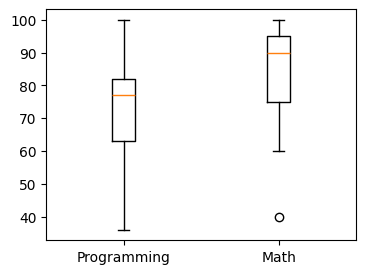

In [5]:
fig, ax = plt.subplots(figsize=(4,3))
columns = ['Programming', 'Math']
ax.boxplot(df.loc[:,columns], labels=columns) # Orange lines are the medians
plt.show()

כפי שניתן לראות, השימוש ב`boxplot` סייע להדגיש את ההבדלים בין המקצעות – ניתן לראות בקלות את המרכז (החציון; בכתום), הפיזור, ונקודות החריגות (outliers) של כל קבוצה, מה שמאפשר לזהות מגמות או פערים בין קבוצות שונות במבט אחד.  

החסרון תרשים `boxplot` הוא שלא ניתן לראות את מספר הערכים בכל תחום, ולכן הוא טוב להבנת מגמות ולא לספירה מדויקתהוא פחות מתאים למצבים שבהם רוצים לספור כמויות מדויקות, למשל כמה סטודנטים קיבלו ציון מעל 85.  

אם ברצוננו ליצור גרף שראה מספרים כאלו, ניתן להשתמש ב**תרשים עמודות (Bar plot)**.   
בגרף זה גודל מספרי, למשל ממוצע, ספירה או ערך מסוים – והגובה של כל עמודה משקף את ערך הנתון. 
התרשים מאפשר לזהות בקלות הבדלים בין קבוצות מעבר לסיכום סטטיסטי ש-Boxplot מספק:

על מנת לצייר גרף זה, נשתמש במתודה `bar`:


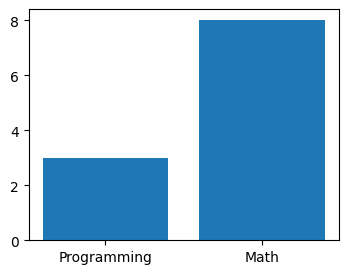

In [6]:
fig, ax = plt.subplots(figsize=(4,3))
columns = ['Programming', 'Math'] 
ax.bar(columns, (df.loc[:,columns]>85).sum())
plt.show()

הגרפים שראינו לדוגמאות לעיל ממחישות לנו כיצד ניתן להציג נתונים מטבלאות בצורה חזותית, ולהסיק מהן תובנות שקשה להסיק באמצעות התסכלות על טבלאות גדולות. ניתן להסתייחס לגרפים אלו לכאל מעין סוגים שונים של סיכומים של טבלאות. 

ראינו דוגמאות לסוגים שונים של גרפים – גרף עקומות, Boxplot וBarplot והבנו לאיזו מטרה כל אחד מתאים, או מילים אחרות, איזה סוג של "סיכום" כל אחד מהם נותן.

המטרה המרכזית ביחידה זו הייתה הקניית כלים בסיסיים ליצירת תצוגות חזותיות בגרפים, והדגמה כיצד הצגה גרפית של נתונים יכולה להפוך טבלה מורכבת להבנה אינטואיטיבית וברורה. 

חשוב לזכור שמה שראינו כאן הוא רק טעימה – קיימים עוד סוגים רבים של גרפים, המתאימים לסוגי נתונים שונים ולשאלות שונות, וכולם יחד מהווים ארגז כלים רחב לניתוח והצגת מידע בצורה יעילה.  
